In [65]:
import pandas as pd
import quandl
import numpy as np
from sklearn.model_selection import cross_validate, train_test_split
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle
import math
import datetime


In [66]:
df=quandl.get('WIKI/GOOGL')
df=  df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df['HL_PCT']=(df['Adj. High']- df['Adj. Close'])/df['Adj. Close']*100.0
df['PCT_change']=(df['Adj. Close']- df['Adj. Open'])/df['Adj. Open']*100.0
df=df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]
forecast_col='Adj. Close'
df.fillna(-9999, inplace=True)
forecast_out=int(math.ceil(0.1*len(df)))
df['label']=df[forecast_col].shift(-forecast_out)

print(df['label'].head())

Date
2004-08-19    214.005615
2004-08-20    210.725489
2004-08-23    208.072299
2004-08-24    218.288837
2004-08-25    223.309335
Name: label, dtype: float64


In [67]:
df.dropna(inplace=True)
y=np.array(df['label'])
x=np.array(df.drop('label', axis=1))
x=preprocessing.scale(x)
x_lately=x[-forecast_out:]
#x=x[:-forecast_out+1]
y=np.array(df['label'])
print(len(x), len(y))

[ 214.00561483  210.7254894   208.07229925 ... 1026.55       1054.09
 1006.94      ]
3081 3081


In [68]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)#shuffle and declaire
classifier=LinearRegression()
classifier.fit(x_train, y_train)
accuracy=classifier.score(x_test, y_test)
forecast_set=classifier.predict (x_lately)
print(forecast_set, accuracy, forecast_out)
df['Forecast']=np.nan


[ 689.37842564  685.19266016  682.93419221  701.32137096  727.24756446
  747.57637522  736.5820612   763.60590699  883.29673485  870.88366118
  891.57531052  896.98600661  862.0457866   836.49199262  841.35320031
  826.93882608  825.21754683  839.89499912  825.37321628  837.43275525
  832.93141843  857.22411765  838.18763515  831.80688739  837.39177244
  871.69383702  864.21436544  865.24820385  867.99928998  870.41761753
  867.80915563  877.3897906   866.64369595  830.26075604  837.91617577
  799.21961821  839.71685978  837.11795662  829.20404915  830.37542756
  808.59417339  808.35859595  810.3351845   792.47622258  805.60910337
  819.57180915  824.76521574  819.84629129  815.28046803  842.53502076
  832.88120801  858.56159856  833.38455508  834.44008489  818.16793063
  826.92062983  823.71279966  814.70693496  799.4516467   796.0880824
  801.25702867  805.6983986   837.92181816  847.4430207   850.77701486
  842.49837035  836.27354274  843.88522624  851.44306734  867.67533083
  861.4

In [70]:
last_date=df.iloc[-1].name
last_unix=last_date.timestamp()
one_day=86400
next_unix=last_unix+one_day
for i in forecast_set:
    next_date =datetime.datetime.fromtimestamp(next_unix)
    next_unix+=one_day
    df.loc[next_date]=[np.nan for _ in range (len(df.columns)-1)]+[i]

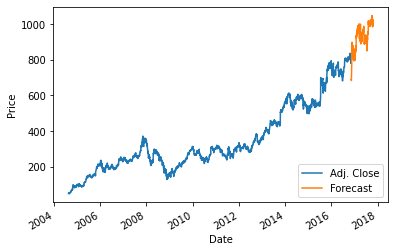

In [71]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show(  )